# A ring problem

This problem is stated in a simplified form compared to how I originally heard it. 
A more general version might substitute 'real number' for 'integer' and 'positive sum'
for 'sum = 1' in what follows.


#### Set up


An ordered set of $n$ integers sums to 1. These integers are placed in a ring called $R_n$ 
so that the last integer is adjacent to the first. Each number location on the ring 
we call a *site*, usually indexed $0, 1, \dots, n-1$. 


The ring is repeatedly subjected to an operation called a *flip*: 
A negative number in the ring is selected by some means and its sign is 
reversed. For example a -7 becomes +7 which means that 14 has been added
to the ring sum. To keep the ring sum constant 7 is then subtracted from
both neighboring sites. Here is a complete example (noting $0$
is adjacent to $4$):
The ring $\;\;\; 0, \; -2, \; -1, \; 3, \; 5, \; 4\;\;\;$ has two available flips: 
The $-2$ and the $-1$. Upon flipping it becomes either
$\;\;\;-2, \; 2, \; -3, \; 3, \; 5, \; 4\;\;\;$ or $\;\;\;0, \; -3, \; 1, \; 2, \; 5, \; 4\;\;\;$.


If no negative values are present the ring is said to be *quiescent* or in
state $Q$: There are no available flps. A ring might be subjected to $q$ flips 
to arrive at $Q$. Given that the ring includes only integers that sum to 1: 
$Q$ must consist of $n-1$ zeros and one $1$ found at one of the $n$ sites.


#### Problem


Show $R_n \; _{\overrightarrow{flips}} \; Q$. In other words: 
Prove that if you keep flipping negative-valued sites then quiescence is inevitable.


#### Spoiler alert


From this point onward is slightly varnished work on solving the problem. 
If you would like to enjoy solving it yourself then read no further; you have all the 
necessary information.



#### Background


* This problem feels related in spirit to the 
[**Collatz conjecture**](https://en.wikipedia.org/wiki/Collatz_conjecture). That is, the 
repeated application of a simple algorithm to some numerical state 'must' arrive at some
specified final state.


* By-hand calculations on some small example rings makes clear that
there are no obvious counter-examples. The assertion seems credible.


* $R_n$ may contain more than one negative value. This gives a choice of flip location. 
Since the assertion is *'$Q$ is inevitable'* the choice of flip site should be made inimically 
if possible in order to produce a counter-example. This might be a cycle where some number
of flips leads from $R_n$ back to $R_n$; or it might be a sequence of rings that perpetually
progresses by flips without ever arriving at $Q$.


* Observation: The definition of a *flip* suggests $n > 2$ but a trivial extension of the
flip idea does permit $n = 2$ and $n = 1$. The latter can only be $Q$. 


* Observation: Any $R_n$ includes at least one positive number; and it can therefore 
be subjected to a reverse-flip procedure that generates a parent ring. A ring with 
$p$ positive values has $p$ parent rings. 


* Observation: If we can produce a metric $M(R_n)$ and show it is strictly monotonic 
under repeated flips, and that it is bounded, and that it is not asymptotic...
then we are pretty darn close to a solution. 


* Observation: There are two distances between sites on $R_n$: The number of hops
between sites considered in the clockwise and then also the number of hops in 
the anti-clockwise direction.


* The partial solution given below required some heuristic development
via computer analysis.  To cut to the chase see ***Solution*** below.


The narrative now continues with some 'conjectures' about these rings and flips.
The conjectures are inspired by computer experiments and they assume the
assertion 'Q is inevitable' is correct.


#### Conjecture 1: Every $R_n$ reduces to one and only one $Q_n$


There is no way to configure a ring $R$ to have symmetry under rotation. This follows from
the sum of values being equal to 1. If there were this conjecture would be false.


#### Conjecture 2: $R \rightarrow Q$ takes the same number of moves $q$ regardless of flip choices


This takes the view that all possible ring configurations for fixed $n$ are found exactly once 
as a vertex in a rigid directed graph. The directed edges of this graph are flips. 


Qualifier: A ring $R_n$ actually has $n$ permutations from rotating the ring 
say clockwise by 1, 2, 3, ..., n-1 sites or equivalently by changing where the
indexing begins. All $n$ versions are *equivalent* and converge to equivalent 
versions of $Q$.


#### Conjecture 3: $R \rightarrow Q$ has a fixed total flip sum $f$ regardless of flip choices


Define the flip sum $f$ as the sum of positive additions in each flip operation. Flipping -3 to 3 adds 6
to the flip sum. Just as the number of required flips is fixed for any $R_n$ so is $f$.  


#### Conjecture 4: Any $R_n$ can be reached through some sequence of inverse flips applied to $Q_n$


Again subject to the rotation qualifier given above. The $1$ 
in $Q_n$ must be in the proper location to reach $R_n$.


#### Conjecture 5: For $c$ equivalent to $c'$ via rotation: If  $c \in C_{n, m}$ then $c' \notin C_{n, m}$ 


Suppose $Q$ is taken through $m$ inverse-flips. Doing this multiple times will produce 
a set $C_{n, m}$ of all possible $R_n$ that are $m$ moves from $Q$.
Then some $c \; \in \; C$ can be rotated to an equivalent $c'$. $c'$ can then be 
flipped $m$ times to arrive at $Q'$ which will be $Q$ rotated 
by the same amount.


#### Program notes


The first program flips $R$ along a single path to arrive at $Q$. It can do so by random
choice or by other means; and it includes a variety of possible metrics.


The second program uses recursion to follow all possible forward paths from $R$. 
    

The third program begins from some $Q_n$ and uses reverse-flips to generate the 
complete directed graph to some depth in child-to-parent fashion.
This gives the number of configurations at a *depth* distance (number of 
flips) from $Q$ which of course depends upon $n$. 


#### Metrics


In practice finding a good $M$ proves difficult. Metrics tend to be  
trend-wise but not strictly monotonic; there is 'noise'.


#### Variant idea


A negative
value could be chosen from the ring and some double increment added to it, say $2e$ whereupon $e$ 
would then be subtracted
from both neighbors to keep the sum constant. Even more generally: $e$ (finite positive)
might vary from one move to another. 


#### further notes

* RK makes the point that $F$ is a discrete $\nabla^2$
* 'How far around the ring must I traverse from some negative site to find a compensatory positive balance?' 
* An interesting thing happens (resembling a CA) when only one negative value remains in $R_n$.
Suppose for example the ring is as shown below where $n\;=\;20$. 
There is only one number available to flip: producing a shifted 7  -7 pair;
and then again to shift another step and so on: A traveling wave 
that propagates to the right around the ring. As the numerical values 
found in the ring do not change during propagation this suggests that
any metric (if it is to be monotonic) should somehow incorporate a type of 'ring distance'. 

```
 0  0  0  0  0  0  0  1  7 -7  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  7 -7  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  7 -7  0  0  0  0  0  0  0  0
...
 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  7 -7
-7  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  7
 7 -7  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  7 -7  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
...
 0  0  0  0  0  7 -7  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  7 -6  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  6 -6  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  6 -6  0  0  0  0  0  0  0  0  0  0
```
    
Notice that the above sequence with the propagating $7, \;-7$ pair is never symmetric
under rotation about the $1$. As a cryptic remark: This means that a distance-based
metric will not necessarily hit a local minimum during this propagation. 

In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt
import sys

# empirical trials led to this "guess" for a function to calculate a flipsum from R to Q
def myFlipSumGuess(R):
    n = len(R)
    mySum = 0.
    for i in range(n-1):
        for j in range(i+1, n):
            s = j - i
            mySum += (float(R[i]*R[j])/2.)*s*(s-n)
    return int(mySum)

# Produce a ring with sum = 1; n sites each with values on -x ... x
def genring(n, x):
    p = []
    while not sum(p) == 1: p = [r.randint(-x, x) for i in range(n)]
    return p

# make sure an index k is in the proper range 0, ..., n-1
def kJustify(k, n):             
    while k < 0: k += n
    while k >= n: k -= n
    return k

# make sure a decremented index k is in the proper range 0, ..., n-1
def kDec(k, n):           
    kmo = k - 1
    while kmo < 0: kmo += n
    return kmo

# make sure an incremented index k is in the proper range 0, ..., n-1
def kInc(k, n):
    kpo = k + 1
    while kpo >= n: kpo -= n
    return kpo

# provide a minimum distance between sites a and b (positive)
def distance(a, b): return min(abs(a - b), abs((a + n) - b), abs((a - n) - b))

# slope (differences) of a list of values, no wrap
def dydx(yofx):
    slope = []
    for i in range(len(yofx)-1): slope.append(yofx[i+1] - yofx[i])
    return slope

def sum_of_p_squares(p):
    eu = 0
    for i in range(len(p)): eu += p[i]*p[i]
    return eu

# returns (for a ring) how many negative-valued sites and a list of their indices
def get_negative_locations(p):
    neglocs = []
    nNeg = 0
    for i in range(n):
        if p[i] < 0:
            neglocs.append(i)
            nNeg += 1
    return nNeg, neglocs

# returns (for a ring) how many positive-valued sites and a list of their indices
def get_positive_locations(p):
    poslocs = []
    nPos = 0
    for i in range(n):
        if p[i] > 0:
            poslocs.append(i)
            nPos += 1
    return nPos, poslocs

# metric_X() returns a score based upon the composition of values in the ring

def metric_canceling_distances(p):
    n, distanceSum, distanceLeft, distanceRight = len(p), 0, 0, 0
    for i in range(n):
        
        if p[i] < 0:                   # for all negative entries
            sumLeft = p[i]             # go left in p until a cumulative sum is >= 0
            for j in range(n-1):
                sumLeft += p[kDec(i-j,n)]
                if sumLeft >= 0: 
                    distanceLeft = j + 1
                    break
            
            sumRight = p[i]             # go left in p until a cumulative sum is >= 0
            for j in range(n-1):
                sumRight += p[kInc(i+j,n)]
                if sumRight >= 0:
                    distanceRight = j + 1
                    break

            distanceScore = max(distanceLeft, distanceRight)
            distanceSum += distanceScore
    # some older thoughts...
    #   sumMinDistances += min(distLeft, distRight)
    #   intermedResult = distLeft + distRight
    #   distList.append(intermedResult)
    #   if len(distList) == 0: return 0
    #   return np.mean(distList)
    return distanceSum

# adds up just the negative values
def metric_sum_of_negatives(p):
    n = len(p)
    sum = 0
    for i in range(n):
        if p[i] < 0: sum -= p[i]
    return sum

# adds up all values but weights positives
def metric_weighted_sum(p, weight):
    n = len(p)
    sum = 0
    for i in range(n):
        if p[i] < 0: sum += p[i]
        else:        sum += weight*p[i]
    return sum

# sum of absolute values of slope from i-1 to i+1
def metric_sum_abs_po_mo_difference(p):
    n = len(p)
    sum = 0
    for i in range(n): sum += np.abs(p[kDec(i,n)] - p[kInc(i, n)])
    return sum

# choose a negative-valued site randomly; and repeat until arriving at Q; return some metrics
def resolve_randomly(p, verbose = False):
    nMoves, m0, m1, m2, flipSum = 0, [], [], [], 0
    ringsize = len(p)
    while True:
        if verbose and nMoves < 3: print(p)
        negP = []
        for i in range(ringsize):
            if p[i] < 0: negP.append(i)
        if len(negP) == 0: break
        nMoves += 1
        k = negP[r.choice(range(len(negP)))]
        rk = p[k]
        p[k] = -rk
        p[kDec(k, ringsize)] += rk
        p[kInc(k, ringsize)] += rk
        flipSum -= rk
        
        # sum of squares of only negative values in the ring
        second_metric = 0
        for i in range(ringsize):
            if p[i] < 0: second_metric += p[i]**2

        m0.append(myFlipSumGuess(p))
        # m1.append(second_metric)
        m1.append(metric_sum_of_negatives(p))
        # m1.append(metric_weighted_sum(p, 5))
        m2.append(metric_sum_abs_po_mo_difference(p))
        # m2.append(some_of_p_squares(p))
        
    return (nMoves, m0, m1, m2, flipSum)

# resolve a ring to Q by always choosing the most negative negative-valued site
def resolve_mostnegative_with_euclidean_metric(p):
    nMoves, metric = 0, []
    ringsize = len(p)
    while True:
        mostneg, mni = 0, -1
        for i in range(ringsize):
            if p[i] < mostneg: mostneg, mni = p[i], i
        if mni == -1: break
        rk = p[mni]
        p[mni] = -rk
        p[kDec(mni, ringsize)] += rk
        p[kInc(mni, ringsize)] += rk
        metric.append(some_of_p_squares(p))
        nMoves += 1
    return (nMoves, metric)

After establishing the utility code (above) we proceed to some testing of flips applied to rings.

In [2]:
# source is a list of rings, each ring being a list of integers
#   This is used in subsequent code to look for patterns in flipsum values and number of required flips to arrive at Q
source = [\
          [-1, 2, 0, 0, 0], [-1, 0, 2, 0, 0], 
          [-1, 2, 0, 0, 0, 0], [-1, 0, 2, 0, 0, 0], [-1, 0, 0, 2, 0, 0], \
          [-1, 2, 0, 0, 0, 0, 0], [-1, 0, 2, 0, 0, 0, 0], [-1, 0, 0, 2, 0, 0, 0], \
          [-1, 2, 0, 0, 0, 0, 0, 0], [-1, 0, 2, 0, 0, 0, 0, 0], [-1, 0, 0, 2, 0, 0, 0, 0], [-1, 0, 0, 0, 2, 0, 0, 0], \
          [-1, 2, 0, 0, 0, 0, 0, 0, 0],
          [-1, 0, 2, 0, 0, 0, 0, 0, 0],
          [-1, 0, 0, 2, 0, 0, 0, 0, 0],
          [-1, 0, 0, 0, 2, 0, 0, 0, 0],
          [-1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
          [-1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
          [-1, 0, 0, 2, 0, 0, 0, 0, 0, 0],
          [-1, 0, 0, 0, 2, 0, 0, 0, 0, 0],
          [-1, 0, 0, 0, 0, 2, 0, 0, 0, 0],
          [-1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [-1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
          [-1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
          [-1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
          [-1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], 
          [-1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0], 
          [-1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0], 
          [-1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
         ]

In [3]:
# These source rings compare binary values and separations for n = 12
source = [\
          [-1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0], 
          [-1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0], 
          [-1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
          [-2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0], 
          [-2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0], 
          [-2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
          [-3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0], 
          [-3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0], 
          [-3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
          [-4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-4, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-4, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0], 
          [-4, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0], 
          [-4, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0], 
          [-4, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
         ]

In [4]:
# for each ring in source[] determine how it resolves

source = [[3,7,2,9,-14,4,-3,-3,-4]]
p=[]
for i in range(len(source)):
    p[:] = source[i][:]
    mfsg = myFlipSumGuess(p); 
    nMoves, m0, m1, m2, flipSum = resolve_randomly(p)
    print(len(p), '(', flipSum, ',', mfsg, ')', nMoves, source[i])

9 ( 1292 , 1292 ) 231 [3, 7, 2, 9, -14, 4, -3, -3, -4]


### Results for binaries

A *binary* ring $B_n$ is a ring with two non-zero integer values. Since the ring sums to one these can be written
in terms of a positive integer $b$ as $b$ and $1-b$. They are placed at any two locations on the ring; and once 
placed they have a minimum separation from one another $s$. As an example a possible $B_9$ is 
$0,\;4,\;0,\;0,\;0,\;0,\;0,\;0,\;-3$ which has $b\;=\;4$ and $s\;=\;2$, the shortest distance from 
the $4$ to the $-3$. 


Can the parameters $n,\;b,\;s$ be used to derive the number of flips $q$ needed to reach $Q$? 
The flip sum $f$? (For the smallest non-trivial (non-quiescent) binary with $b=2$ where $b$ is
adjacent to $1-b$ ($s=1$) we find $f$ = $q$. The pattern of how this changes as $b$ increases is 
resolved below.)

In any case as $n$ increases so does the maximum separation $s_{max}$. The first few results for 
binary rings with $b=2$ are below. Each row corresponds to increasing $n$ starting at $n=5$ up to
$n=12$ (the first entry). The subsequent row entries are pairs: $s$-value followed by flipsum $f$. 
Notice that reading downwards the $s=1$ values for $f$ are simply $n-1$. As the separation $s$ 
increases to its maximum value from left to right $f$ also increases; in diminishing steps.

```
 5  1   4  2   6
 6  1   5  2   8  3   9
 7  1   6  2  10  3  12
 8  1   7  2  12  3  15  4  16  
 9  1   8  2  14  3  18  4  20
10  1   9  2  16  3  21  4  24  5  25
11  1  10  2  18  3  24  4  28  5  30
12  1  11  2  20  3  27  4  32  5  35  6  36
```
If we can reduce this to a formula for all binary rings (i.e. in terms of $n,\;b,\;s$) then we have 
a basis for a go at generalization to all rings. 

$$
f=\frac{b^2-b}{2}\;\times\;S(n-1,\; s-1)
$$

When $s=1$ the above function $S$ is simply $n-1$. Let's invent the function...

When the gap $s$ is 1 the multiplier $S$ is $n-1$. That is for $n=3, 4, 5, 6, ...$ the corresponding
$S$ is $2, 3, 4, 5, ...$ to arrive at the flipsum $f$. 


The gap-2 column multiplier $S$ is $n-1$ + 0, 1, 2, 3, ... as $n$ runs 3, 4, 5. So $S = 2n-4$.
Notice that this gives 2 and 4 for $n=3$ and $n=4$ but those gaps do not make sense for those $n$ values...


The gap-3 column multiplier $S$ is $n-1$ + x x x 4 6 8 10 12 corresponding to n = 3, 4, 5, 6, 7, 8, 9, 10.
So that is $n-1+2*(n-4)$ or $3n-9$. 


How about for gap-4? Here it starts at n = 8.

3  4  5  6  7  8  9 10 11 12
x  x  x  x  x  9 12 15 18 21

So we have $n-1+3*(n-5)$ or $4n-16$. 

So no we have as a function of gap-1, gap-2, gap-3, gap-4 the formulas for $f$:
$n-1$, $2n-4$, $3n-9$, $4n - 16$. So there is your pattern: The coefficient of $n$ 
in terms of gap $s=1,2,3,4,...$ is just $s$. The subtractor in terms of $s=1,2,3,4,...$ 
is just $s^2$. 

We now have for binary ring with values $b$ and $1-b$ separated by a closest distance $s$
that the flipsum $f = \frac{b^2-b}{2}\;\times\;(sn-s^2)$


How about variability of $q$ (the number of moves required) as a function of the binary
base $b$? Here are some results for $n=12$ where the value of $s$ runs 1, 2, 3, 4, 5, 6
as $b$ run 2, 3, 4, 5.


```
       s    f   s    f   s    f   s    f   s     f   s    f
b = 2: 1   11   2   20   3   27   4   32   5    35   6   36
    q:     11       20       27       32        35       36    i.e. q = 2f/b
b = 3: 1   33   2   60   3   81   4   96   5   105   6  108
    q:     22       40       54       64        70       72        
b = 4: 1   66   2  120   3  162   4  192   5   210   6  216
    q:     33       60       81       96       105      108         
b = 5: 1  110   2  200   3  270   4  320   5   350   6  360 
    q:     44       80      108      128       140      144        
```

Hence 

$$f = \frac{b(1-b)}{2}\;\times\;(s)(s-n)$$

and 

$$q = \frac{2f}{b}$$

6 flipsum: 73 33 [4, 0, 1, -3, -2, 1]


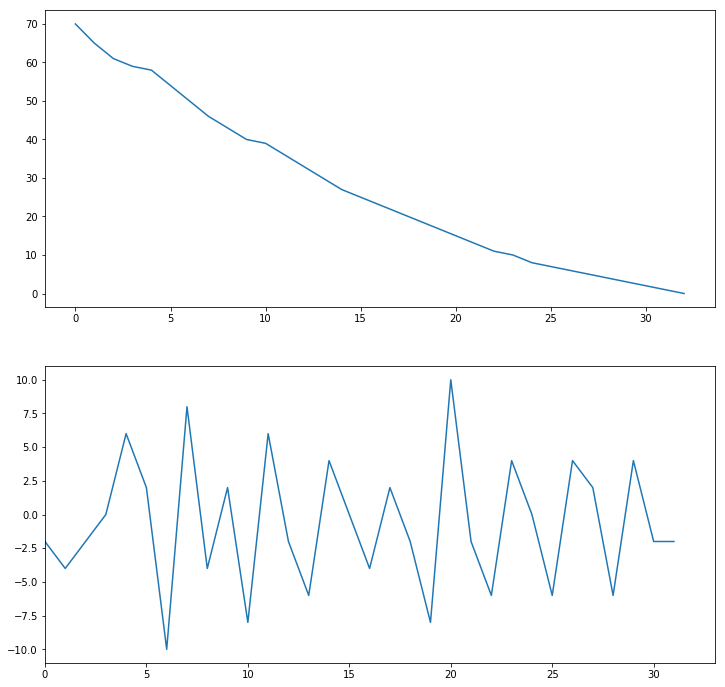

In [5]:
# p = [4, 12, -4, 7, 6, -12, -7, -5, 14, -14]
p = [4, 0, 1, -3, -2, 1]
R=p[:]
nMoves, m0, m1, m2, flipSum = resolve_randomly(p)
print(len(p), 'flipsum:', flipSum, nMoves, R)

# m3 = [m0[i]+m1[i] for i in range(len(m0))]

# fig, ax = plt.subplots(4, figsize=(12,12))
# fig, ax = plt.subplots(1, figsize=(12,6))
fig, ax = plt.subplots(2, figsize=(12,12))
# fig, ax = plt.subplots(3, figsize=(12,18))

ax[0].plot(range(nMoves), m0)
ax[1].set_xlim(0, nMoves)
ax[1].plot(range(nMoves-1), dydx(m2))
ax[1].set_xlim(0, nMoves)
# ax[2].plot(range(nMoves), m2)
# ax[2].set_xlim(0, nMoves)

# this is a quick monotonic check: If not strictly monotonic cry out!
for i in range(len(m0)-1):
    if m0[i+1] >= m0[i]: print("Bounce!")

In [6]:
# second program: forward exhaustive search of flip paths

# a recursive approach to explore all choices of flip location in parallel
# a path is a linked sequence of rings
# This begins to explore the graph of paths leading to a single quiescent state
# 
# What to do next here:
#   - probably review all the variables
#   - add a degenerate[] counter that matches up with the pHistory[] list
#     - this would count the number of times this configuration was arrived at
#     - and then together with Depth[] we have a view of the graph generated from initial p[] to quiescent[]
#     - also needed is a histogram of configs across the depths: how many zeros, how many ones, ... 
#     - also needed (See remarks after) is a way of seeing the number of flips at each location on the ring
#       - does this distribution change for different paths from P[0] to Q?

import random as r
import numpy as np
import matplotlib.pyplot as plt

# to copy a list p to another (separate memory) list q use: q[:] = p[:]

# iterative function to try the next negation
# passed both a depth and a ring p[]
# get the list of negative locations and...
#   if we are done: return
#   else loop over each such location: flip each one into a new q[] and call recursive_flip(q)

def recursive_flip(depth, p):
    
    global maxDepth
    global nDegenerate
    global nHistoryDepthMismatches
    global nFlips
    global pHistory, pDepth, pDegeneracy
    
    # print(p)
    
    if depth > maxDepth: maxDepth = depth

    if p not in pHistory:
        pHistory.append(p)
        pDepth.append(depth)
        pDegeneracy.append(1)
    else: print('logic failure: This p should not be in pHistory but it is...')
        
    nNeg, nlocs = get_negative_locations(p)
    
    if nNeg == 0 and p not in quiescent: quiescent.append(p)
            
    for j in range(nNeg):                             # transit through all negative-valued locations in p (j)
        q=p[:]                                        #   make a copy of p as q
        flipperwalt = -q[nlocs[j]]                    #   do the flip at location j in q
        q[nlocs[j]] = flipperwalt                     #  
        q[kJustify(nlocs[j]-1, n)] -= flipperwalt     #  
        q[kJustify(nlocs[j]+1, n)] -= flipperwalt     #   ...so now q with one flip is actually at (depth+1)
        if q in pHistory:                             # has q already been found? (i.e. is it degenerate?)
            nDegenerate += 1                          #   count these
            hIndex = pHistory.index(q)                #   the history index where this degeneracy was found is hIndex
            pDegeneracy[hIndex] += 1                  #     ...which we can use to track the degeneracy count
            if depth + 1 != pDepth[hIndex]:           #   if the depth of the degeneracy is *different*... 
                nHistoryDepthMismatches += 1          #     track this as a depth mismatch
                print('history depth mismatch:',  \
                  depth, hIndex,                  \
                  pDepth[hIndex],                 \
                  pHistory[hIndex], q)
                
        else:
            nFlips += 1
            recursive_flip(depth+1, q)              # as q is new: recurse on q
            
    return
        

xtreme = 8
n = 6
p = genring(n, xtreme)
# large: p = [6, -6, -6, 3, 6, -2]
# p = [-7, 8, -7, 6, -7, 8]

sumsquares = sum_of_p_squares(p)

maxDepth = -1
pHistory, pDepth, pDegeneracy = [], [], []
# These are...
#   a list of p-lists which align with pDepth[]: All the p's we have found
#   a corresponding list of depths from the start position where each p was encountered
#   a list of how many times this ring was arrived at via a flip

quiescent = []            # a list of p-states that contain no negatives
histogram = []
nDegenerate = 0
nHistoryDepthMismatches = 0
nFlips = 0
print(p)
recursive_flip(0, p)

if len(quiescent) > 1: print('there were', len(quiescent), 'quiescent states')
else: print('quiescent:', quiescent[0])
print('history depth-mismatches = ', nHistoryDepthMismatches)
print('there were', nDegenerate, 'degeneracies: a ring produced by different paths')
print('max depth is', maxDepth)
print('there are', len(pHistory), 'configurations generated')
print('sum of squares to configs ratio is', sumsquares/float(len(pHistory)))
print('maximum degeneracy value was', max(pDegeneracy))

[0, 2, 2, 5, -7, -1]
quiescent: [1, 0, 0, 0, 0, 0]
history depth-mismatches =  0
there were 1513 degeneracies: a ring produced by different paths
max depth is 46
there are 1200 configurations generated
sum of squares to configs ratio is 0.06916666666666667
maximum degeneracy value was 4


#### Remarks on the second program

The program supports a conjecture: Choice of which negative to flip is immaterial to the total
number of flips needed to arrive at $Q$. From $R$ the tree expands to some maximum breadth at 
some depth and this collapses eventually to smaller configuration sets.

One idea is to try and regard some $R$ as a superposition of 
numbers that are immutable; for example stacks of ones and negative
ones that are shuffled to cancel leaving a single 1 remainder in $Q$.
This suggests labeling and tracking their progression in flips.


Another idea is to look for commonality in different parents of a degenerate $R$. 


Finally a histogram of flip locations might be interesting. If the number of flips is fixed
in going from $R$ to $Q$: What about the distribution of those flips about the ring? 



In [7]:
# Third program: Exhaustive reverse search from quiescent to R
# Recursive as with the Second program above; reverse flips expanding out to some fixed flip depth

import random as r
import numpy as np
import matplotlib.pyplot as plt

# iterative function to try a next reverse-flip
# number depth in the reverse-flip direction and treeDepth to constrains how far we go
# start by receiving a ring state p[]
#   already found? return
#   else: 
#     get the list of positive locations
#     loop over each location: 
#       Copy p[] to q[]
#       reverse-flip the next site on q[] 
#       call reverse_flip(q)

def reverse_flip(depth, p, flipSum):
    
    global treeDepth
    global nDegenerates
    
    if p in pHistory:
        pIndex = pHistory.index(p)
        pDegeneracy[pIndex] += 1
        nDegenerates += 1
        return
    
    n = len(p)
    pHistory.append(p)                       # list of p[] lists
    pDepth.append(depth)                     # corresponding depth of this p[] 
    pFlipSum.append(flipSum)
    pDegeneracy.append(1)
    
    nPos, plocs = get_positive_locations(p)
    
    if depth >= treeDepth: return

    # to reach here means we plan to go to the next depth for all positive sites in p[]
    for j in range(nPos):        
        q=p[:]
        reverse_flipperwalt = q[plocs[j]]     # a positive number (we are going backwards!)
        q[plocs[j]] = -reverse_flipperwalt    # the reverse-flip to the negative
        q[kJustify(plocs[j]-1, n)] += reverse_flipperwalt
        q[kJustify(plocs[j]+1, n)] += reverse_flipperwalt
        reverse_flip(depth + 1, q, flipSum + reverse_flipperwalt)

    return

treeDepth, nDegenerates = 30, 0
ncells_start = 7
ncells_end = ncells_start + 1
p, pHistory, pDepth, pFlipSum, pDegeneracy = [], [], [], [], []

for n in range(ncells_start, ncells_end):
    p, pHistory, pDepth, pFlipSum, pDegeneracy = [], [], [], [], []
    p.append(1)
    for i in range(1, n): p.append(0)

    nDegenerates = 0            # this is an across-the-tree number of re-arrivals
    reverse_flip(0, p, 0)       # will populate pHistory, pDepth, pFlipSum which are unsorted
    b=[]                        # ok b is an empty list
    for i in range(treeDepth+1): b.append(0)            # now b is a bunch of zeroes
    for i in range(len(pHistory)): b[pDepth[i]]+=1      # now b is a histogram of how many p's existed at each depth
    print(n, 'sites;', nDegenerates, 'total degeneracy to depth', treeDepth, 'where quiescent has depth 0')
    print('histogram of p-count with depth:\n', b)                           # and there is your readout
    for j in range(treeDepth+1):
        for k in range(len(pHistory)):
            if pDepth[k] == j:
                myFSG = myFlipSumGuess(pHistory[k])
                append_text = '!!!!!!!' if myFSG == pFlipSum[k] else ''
                print('  '*j, pDegeneracy[k], pFlipSum[k], myFSG, pHistory[k], append_text)


7 sites; 13901 total degeneracy to depth 30 where quiescent has depth 0
histogram of p-count with depth:
 [1, 1, 2, 3, 5, 7, 11, 14, 20, 26, 35, 44, 58, 71, 90, 110, 136, 163, 199, 235, 282, 331, 391, 454, 532, 612, 709, 811, 931, 1057, 1206]
 1 0 0 [1, 0, 0, 0, 0, 0, 0] !!!!!!!
   1 1 1 [-1, 1, 0, 0, 0, 0, 1] !!!!!!!
     1 2 2 [0, -1, 1, 0, 0, 0, 1] !!!!!!!
     1 2 2 [0, 1, 0, 0, 0, 1, -1] !!!!!!!
       1 3 3 [0, 0, -1, 1, 0, 0, 1] !!!!!!!
       2 3 3 [1, -1, 1, 0, 0, 1, -1] !!!!!!!
       1 3 3 [0, 1, 0, 0, 1, -1, 0] !!!!!!!
         1 4 4 [0, 0, 0, -1, 1, 0, 1] !!!!!!!
         2 4 4 [1, 0, -1, 1, 0, 1, -1] !!!!!!!
         1 4 4 [-1, 0, 1, 0, 0, 1, 0] !!!!!!!
         2 4 4 [1, -1, 1, 0, 1, -1, 0] !!!!!!!
         1 4 4 [0, 1, 0, 1, -1, 0, 0] !!!!!!!
           1 5 5 [0, 0, 0, 0, -1, 1, 1] !!!!!!!
           2 5 5 [1, 0, 0, -1, 1, 1, -1] !!!!!!!
           2 5 5 [-1, 1, -1, 1, 0, 1, 0] !!!!!!!
           2 5 5 [1, 0, -1, 1, 1, -1, 0] !!!!!!!
           2 5 5 [-1, 0, 1, 0, 1, -1

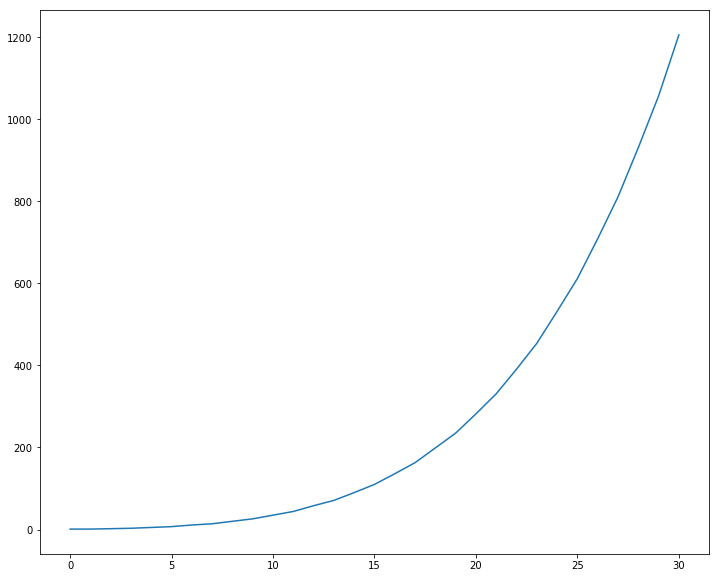

In [8]:
# The list b[] is how many configrations of the ring exist at depth = number of (inverse) flips
fig, ax = plt.subplots(1, figsize=(12,10))
ax.plot(range(treeDepth+1), b)

#### The progression to a partial solution


Early attempts at this problem produced a number of metrics, all of which produced erratic and non-monotonic
curves. These eventually tended to converge but there was no 'smoking gun metric'. It was clear that arbitrary
rings were hard to analyze; so simpler rings with two or three non-zero values were introduced.


The code was refined a bit to look more carefully at ring behavior under flips. 
The second and third programs to do exhaustive recursive searches forward and backward respectively
gave further clues. In particular it became clear that while ring flips could be chosen from among
negative sites, nevertheless the initial ring was a vertex in a very rigid directed graph of all 
rings. This di-graph clearly has multiple paths to a particular ring, some intrinsic degeneracy. 
In a path graph the number of edges departing some $R$ equals the number of negative numbers 
found in $R$. 


In passing it became apparent that the $n$ equivalent versions of $Q$ would correspond to $n$
permutations of any ring $R$ under rotation of indices.
The reverse-flip graph originating from $Q$ generates all possible $R_n$ (with perhaps a
rotation of indices needed). In contrast the exhaustive graph of all possible forward-flips 
on some initial $R$ produce only a small subset of those 
rings en route to $Q$. It would be interesting to visualize this with NetworkX.


A key useful idea was to look at the sum of flips in the path from $R$ to $Q$. This applied to 
simple rings (particularly binaries) finally provided enough information to guess a workable 
metric; particularly because the flip sum $f$ appeared to be constant regardless of flip site
choices. This guess is the basis for the partial solution to the problem given below. 


For n $n=3$ ring it is easy to guess $f(R)$: It is twice the absolute value of the sum 
of neighbor-products. That is, suppose a 3-site ring has values $a$, $b$ and $c$. Then 
$f\;=\;2 \left| {ab+bc+ca} \right|$. At a given depth in the tree the 
value of $f$ varies from one $R$ to another; so the constancy of $f$ is related to 
ring configuration more than 'number of flips to $Q$'. 


That said it would be nice
to revisit depth $q$ as a value to calculate directly from $R$. The candidate 
function is $\frac{2f}{b}$ for binaries so extending this might be one path to
completing the partial solution given below.


#### Integer space idea 


We can see a ring as a series of $n-1$ integers with arbitrary sum followed by a final 
integer chosen to give the ring a total sum of $1$. This is an $n-1$-dimensional space of integers
where we can look for extremal values of a metric defined on that space. This idea is related to the 
notion that for a fixed $n$ the set of possible ring paths is a directed graph. 



 


## Solution (incomplete)


***In what follows we show there is a good monotonic-under-flips scalar function $M$ that behaves like
a potential when applied to rings. However in order to show that this metric solves the original 
problem we need to also establish that it is bounded; which is still an open question.***


Given a ring $R_n$ of $n$ integers with sum $1$ my aim is to show that under repeated flips of 
negative values (as described above) $R_n$ will invariably be transformed into a quiescent state $Q$ 
where no further flips are possible. I introduce a metric $M(R_n)$ suggested by empirical trials
and show that a flip on $R_n$ produces a new ring $R'_n$ where $M(R'_n) \; < \; M(R_n)$. 
Establishing that $M$ is bounded and un-asymptotic would solve the (integer-valued, sum 1) ring problem.

Take $R_n\;=\;a_0\;a_1\;a_2\;\cdots\;a_{n-1}$ where $a_1 < 0$ without loss of generality. Define the 
distance $s$ between two sites on the ring to be the number of steps from one site to the other. 
Note if a distance about the ring is $s$ then the negative of the distance in the other direction is $s-n$.
The product $s(s-n)$ is symmetric under reversal of directions so the metric give does not depend on 
the direction used to measure distance. 


Define $M$ as: 


$$\large{M(R_n) = \sum_{i \ne j \; \in \; 0 \dots n-1}{a_i \cdot a_j \cdot s \cdot (s-n)}}$$


This is a weighted sum of the products of all pairs of elements of the ring. The weighting factor $s \cdot (s-n)$
is negative because $0 \le s \lt n$. This weight is most negative when
two elements of the ring are as far apart as possible. Each term
of this sum will be positive or negative depending on the signs of $a_i$ and $a_j$. A passing claim:
This metric yields $f$, the sum of all flip values during the (inevitable)
traverse from an initial state $R_n$ to $Q$. (Flipping a $-3$ to $+3$ adds $6$ to this flip sum $f$.)


A new ring $R'_n$ is produced by flipping the negative value $a_1$. 
The first three elements of $R'_n$ will be $a'_0 = a_0+a_1$, $a'_1 = -a_1$, 
and $a'_2 = a_2+a_1$
and the remaining sites are unchanged. The metric gradient $\Delta M = M(R_n) \; - \; M(R'_n)$ is thus


$
\Delta M\;=\;(1-n)a_0 a_1 + 2(2-n)a_0 a_2 + (1-n)a_1 a_2 - (1-n)(a_0+a_1)(-a_1) - 2(2-n)(a_0+a_1)(a_2+a_1) - (1-n)(-a_1)(a_2 + a_1) \\
\;\;\;\;\;\;\;\;\;\;\;\;\; + \; additional \; sums \; from \; M(R_n)\;-\;additional \; sums \; from \; M(R'_n)
$


There are four *additional sums* to consider from each of the two metrics $M(R_n)$ and $M(R'_n)$. 
From $M(R_n)$ these are... 

* the sum of all $a_0$, $a_1$ and $a_2$ products with $a_3, \dots, a_{n-1}$
* the sum of all $a_i \; \cdot \; a_j$ products with $i, j > 2$

The latter sum is unaffected by the flip operation on $a_1$ and will therefore cancel itself in $\Delta M$. 
The first three sums involving $a_0$, $a_1$ and $a_2$ do change from $M(R_n)$ to $M(R'_n)$. The index $i$ will
run as noted from $3$ to $n-1$ for each sum so that we have the complete expression 

$$
\Delta M =
a_0 \; a_1 \cdot 1 (1-n) \; + \; a_0 \; a_2 \cdot 2 \; (2-n) \; + \; a_1 \; a_2 \cdot 1 (1-n) \\
\text{ }\\
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
+ a_0 \sum_{i=3}^{n-1}{a_i i (i-n)} + a_1 \sum_{i=3}^{n-1}{a_i (i-1)(i-1-n)} + a_2 \sum_{i=3}^{n-1}{a_i (i-2)(i-2-n)} \\ 
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
- \biggl[ \;(a_0+a_1) (-a_1) \cdot 1 (1-n) \;+\; (a_0+a_1)  (a_2+a_1) \cdot 2 \; (2-n) \; + \; (-a_1)(a_2 + a_1)\cdot 1 (1-n) \\
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
+ (a_0 + a_1) \sum_{i=3}^{n-1}{a_i i (i-n)} + (-a_1) \sum_{i=3}^{n-1}{a_i (i-1)(i-1-n)} 
+ (a_2 + a_1) \sum_{i=3}^{n-1}{a_i (i-2)(i-2-n)} \biggr]
$$


The $\sum$ sums are independent of $a_0$, $a_1$, and $a_2$. Let's write them for the moment as:


$$
T\;=\;\sum_{i=3}^{n-1}{a_i i (i-n)}
$$

$$
U\;=\;\sum_{i=3}^{n-1}{a_i (i-1)(i-1-n)}
$$

$$
V\;=\;\sum_{i=3}^{n-1}{a_i (i-2)(i-2-n)}
$$

such that the gradient becomes


$$
\Delta M\;\;=\;\; 
a_0 \; a_1 (1-n) \; + \; a_0 \; a_2 (4-2n) \; + \; a_1 \; a_2 (1-n)
+ a_0 T + a_1 U + a_2 V \\ 
- \biggl[ \;(a_0+a_1) (-a_1) (1-n) \;+\; (a_0+a_1)  (a_2+a_1) (4-2n) \; + \; (-a_1)(a_2 + a_1) (1-n) + (a_0 + a_1) T + (-a_1) U 
+ (a_2 + a_1) V \biggr]
$$

Distributing the minus sign, expanding out the products and combining like terms...


$$
\Delta M\;\;=\;\; 
a_0 \; a_1 (1-n) \; + \; a_0 \; a_2 (4-2n) \; + \; a_1 \; a_2 (1-n)
+ a_0 T + a_1 U + a_2 V \\ 
+ \;(a_0+a_1)(a_1)(1-n) \;+\; (a_0+a_1)(a_2+a_1)(2n-4) \; + \; a_1(a_2 + a_1)(1-n) - (a_0 + a_1) T + a_1 U 
- (a_2 + a_1) V
$$

$$
\Delta M\; = \; a_0 a_1 - n a_0 a_1 + 4 a_0 a_2 - 2 n a_0 a_2 + a_1 a_2 - n a_1 a_2 + a_0 T + a_1 U + a_2 V \\
+ a_0 a_1 - n a_0 a_1 + a_1^2 - n a_1^2 - 4 a_0 a_2 + 2 n a_0 a_2 - 4 a_0 a_1 + 2 n a_0 a_1 - 4 a_1 a_2 + 2 n a_1 a_2 
- 4 a_1^2 + 2 n a_1^2 \\
+ a_1 a_2 - n a_1 a_2 + a_1^2 - n a_1^2 - a_0 T - a_1 T + a_1 U - a_2 V - a_1 V
$$

...we arrive at...


$$
\Delta M\; = \; -2 a_0 a_1 - 2 a_1 a_2 + 2 a_1 U - 2 a_1^2 - a_1 T - a_1 V
$$

This is symmetrical in $a_0$ versus $a_2$ as we would hope for. Factoring out $a_1$ we have

$$
\Delta M\; = \; a_1 \; \bigl[ \; -2 (a_0 + a_1 + a_2) - T + 2 U - V \; \bigr]
$$

Since the ring sum is $1$ we have $a_0 + a_1 + a_2 = 1 - \sum_{i=3}^{n-1}{a_i}$. This pleasantly removes all reference
to ring values $a_0$ and $a_2$. Combining $-T + 2U - V$ into a single sum we then have


$$
\Delta M\; = \; a_1 \; \bigl[ \; -2\;\bigl( 1 - \sum_{i=3}^{n-1}{a_i} \bigr) + \sum_{i=3}^{n-1}{a_i(-i(i-n) + 2(i-1)(i-1-n) - (i-2)(i-2-n)} \; \bigr]
$$

Then we can separate $a_1 \cdot -2$ and combine the remaining sums:

$$
\Delta M\; = \; -2a_1 \;+\;a_1 \sum_{i=3}^{n-1}{a_i \Bigl(2 - i(i-n) + 2(i-1)(i-1-n) - (i-2)(i-2-n) \Bigr)}
$$

The expression in parenthesis expands by rainbows:

$$
\Bigl( \cdots \Bigr) = 2 - i^2 + in + 2i^2 - 2i - 2in - 2i + 2 + 2n - i^2 + 2i + in + 2i - 4 - 2n 
$$

where everything cancels: The sum vanishes leaving 

$$\Delta M = -2 a_1$$


This means that $M$ changes from one configuration $R_n$ to the next $R'_n$ 
by the amount added in the flip.

As $-2a_1$ is a positive integer when $a_1$ is a negative integer (our requirement for a flip site) this shows 
that the metric $M$ is monotonically decreasing in integral steps from an initial finite value $M(R_n)$. This is
independent of where the flip site is chosen; so as it moves about from one flip to the next we see that $M$
behaves like a potential function that is always decreasing. 

Because $M$ strictly decreases in integer-valued amounts it is not asymptotic to some limit. 
Computer analysis suggests $M$ is positive-valued and 
through flips invariably arrives at $M=0$ as the ring arrives at $Q$.


#### the binary ring


Define a *binary* ring in terms of a positive integer $b$: A binary ring $B_n$ has two 
non-zero values $b$ and $1-b$. 


#### further observations


* The only $R_n$ with $n-1$ zeros is $Q$ which has $M(Q)=1$. 
* $B_n$ has $M(B_n)>0$.
* For $n=3$ we can show (e.g. with some calculus) that all $M(R_3 \ne Q)>0$ where $M(Q)=0$. 



#### notes on the remaining problem


The problem is that a ring might start with metric $M=-19$ where $M$
decreases monotonically forever under repeated flips. It would be simplest 
to show that $M$ must be positive valued for any ring but $Q$. 


Another idea might be to use reverse flips and perhaps
an induction strategy to show that all possible rings are infallibly produced by direct 
ascent from $Q$ and *only* $Q$. 


Let's reconsider the definition of $M(R_n)$.
Indexing the sites of $R_n$ as $0, 1, 2, \dots, n-1$ 
$M$ is explicitly a double sum with pair indices $i$ and
$j$: $i$ runs from $0$ to $n-2$ and $j$ runs from $i+1$ to $n-1$. This covers 
every pair of elements of $R_n$ without duplication.


$$
\large{
M(R_n)=\sum_{i, j \; \in \; 0 \dots n-1}^{i \ne j}{a_i \cdot a_j \cdot s \cdot (s-n)}=
\sum_{i=0}^{n-2}{a_i \cdot \sum_{j=i+1}^{n-1}a_j(j-i)(j-i-n)}
}
$$


This is a sum of $\large{\binom{n}{2}}=\large{\frac{n(n-1)}{2}}$ products. 


Writing this as a matrix of (negative-valued) weighting factors it is clear that the double sum 
could be re-cast as a sum over diagonals of sums along those diagonals. In that case each diagonal
has a fixed weight. (Some care is required for $n$-even versus $n$-odd.)